In [1]:
import os
import pickle
from collections import defaultdict

import matplotlib.pyplot as plt

In [2]:
def gtExtract(testfile, method):
    gt_confusion = defaultdict(set)
    if method == 'UDN':
        with open(testfile, 'r', encoding='utf8') as fp:
            fp.readline()
            for line in fp:
                error = line.strip().split('|||')[1].split(', ')

                for idx,cor in zip(error[::2],error[1::2]):
                    error = line[int(idx)-1]
                    gt_confusion[error].add(cor)
    elif method == 'SIGHAN2015':
        seqfilename, testGtfilename = testfile
        gt_confusion = defaultdict(set)
        with open(seqfilename, 'r', encoding='utf8') as seqFile,\
        open(testGtfilename, 'r', encoding='utf8') as gtFile:
            for seq_line, gt_line in zip(seqFile, gtFile):
                seq_id, seq = seq_line.strip().split('\t')
                gt_lst = gt_line.strip().split(', ')
                gt_id, gt_errors = gt_lst[0], gt_lst[1:]
                if seq_id[5:-1] == gt_id:
                    for idx, corr_ch in zip(gt_errors[::2], gt_errors[1::2]):
                        error_ch = seq[int(idx)-1]     
                        gt_confusion[error_ch].add(corr_ch)
    return gt_confusion

In [3]:
def sysExtract(confusionset_file):
    ch5400 = set(ch.strip() for ch in open('./ch_5401.txt', 'r', encoding='utf8'))
    ncm = pickle.load(open(confusionset_file, 'rb'))
    sys_confusion = defaultdict(set)
    for error, cands_info in ncm.items():
        if error not in ch5400: continue
        sys_confusion[error].update(cands_info.keys())
        
    return sys_confusion

In [4]:
def info(confusion, fig_token):
    '''Get basic information about NCM 
    
    '''
    total_error = len(confusion)
    cands = [(ch, len(cand)) for (ch, cand) in 
        sorted(confusion.items(), key= lambda x:len(x[1]), reverse=True)]

    sum_cands = sum(cnt for _, cnt in cands)
    max_cands = max(cnt for _, cnt in cands)
    min_cands = min(cnt for _, cnt in cands)
    mean_cands = sum_cands/total_error
    
    if total_error%2 == 0:
        mid_cands = cands[total_error//2]
    else:
        mid_cands = cands[(total_error+1)//2]
    
    print('Total_error: {}\nSum_cands: {}'.format(total_error, sum_cands))
    print('Max_cands: {}\nMin_cands: {}'.format(max_cands, min_cands))
    print('Mean_cands: {:.2f}\nMid_cands: {}'.format(mean_cands, mid_cands))
    print('Top 20 cands:\n {}'.format(cands[:20]))
    
    plt.plot([cnt for _, cnt in cands])
    plt.xlabel('Index')
    plt.ylabel('Number of candidates')
    fig = plt.gcf()
    plt.show()
    fig.savefig('./confusionTable/confuInfo_{}.png'.format(fig_token), dpi=100)

In [5]:
file = './confusionTable/0601/confu_9999995_8_50.pkl'

In [6]:
sys_c = sysExtract(file)

Total_error: 3411
Sum_cands: 12465
Max_cands: 24
Min_cands: 2
Mean_cands: 3.65
Mid_cands: ('俱', 3)
Top 20 cands:
 [('是', 24), ('事', 22), ('以', 18), ('至', 16), ('起', 15), ('經', 15), ('之', 14), ('付', 14), ('識', 13), ('師', 13), ('心', 13), ('正', 13), ('式', 13), ('一', 13), ('長', 13), ('知', 13), ('息', 13), ('決', 13), ('時', 13), ('機', 13)]


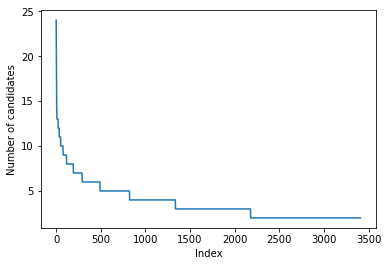

In [7]:
info(sys_c,'myworking')

In [26]:
data_root = './confusionTable/basicExtact/'
filelist = {file:os.path.join(data_root, file) for _,_,files in os.walk(data_root) for file in files if 'confu' in os.path.splitext(file)[0]}

In [27]:
filelist

{'confu_all.pkl': './confusionTable/basicExtact/confu_all.pkl',
 'confu_in_1.pkl': './confusionTable/basicExtact/confu_in_1.pkl',
 'confu_in_2.pkl': './confusionTable/basicExtact/confu_in_2.pkl',
 'confu_in_3.pkl': './confusionTable/basicExtact/confu_in_3.pkl',
 'confu_in_4.pkl': './confusionTable/basicExtact/confu_in_4.pkl',
 'confu_in_5.pkl': './confusionTable/basicExtact/confu_in_5.pkl',
 'confu_in_6.pkl': './confusionTable/basicExtact/confu_in_6.pkl'}

In [38]:
sys_c = sysExtract(filelist['confu_in_6.pkl'])

In [41]:
for ch, cands in sys_c.items():
    if len(cands)==0:
        print(ch)

In [44]:
sys_c['青']

{'清', '菁', '蜻', '輕', '青'}

In [40]:
len(sys_c)

5361

In [23]:
ch5400 = set(ch.strip() for ch in open('./ch_5401.txt', 'r', encoding='utf8'))

In [14]:
sys_c = pickle.load(open('./confusionTable/rule/rule_chPairs.pkl', 'rb'))

Total_error: 3769
Sum_cands: 9103
Max_cands: 16
Min_cands: 1
Mean_cands: 2.42
Mid_cands: ('鬱', 2)
Top 20 cands:
 [('愉', 16), ('識', 14), ('息', 14), ('是', 13), ('如', 13), ('愚', 13), ('事', 12), ('付', 12), ('胡', 12), ('新', 11), ('折', 11), ('而', 11), ('俞', 11), ('資', 10), ('適', 10), ('余', 10), ('知', 10), ('緣', 10), ('游', 10), ('兒', 10)]


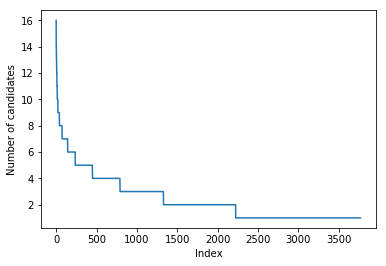

In [15]:
info(sys_c, 'rule')

In [31]:
del sys_c

In [37]:
converageConfusion(data_root)

==== confu_all.pkl
Total_error: 5361
Sum_cands: 1360288
Max_cands: 1257
Min_cands: 38
Mean_cands: 253.74
Mid_cands: ('滑', 211)
Top 20 cands:
 [('厭', 1257), ('苑', 1130), ('齊', 1067), ('姬', 1033), ('錡', 1026), ('訢', 1012), ('邪', 1010), ('貍', 963), ('射', 958), ('熨', 957), ('拗', 957), ('圩', 905), ('咦', 892), ('禺', 875), ('沂', 871), ('湛', 862), ('芋', 860), ('髻', 860), ('菸', 849), ('揖', 845)]


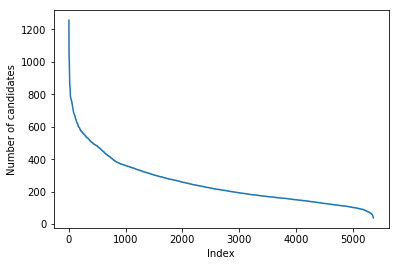

==== confu_in_1.pkl
Total_error: 5361
Sum_cands: 997132
Max_cands: 1244
Min_cands: 2
Mean_cands: 186.00
Mid_cands: ('瞞', 144)
Top 20 cands:
 [('厭', 1244), ('苑', 1080), ('齊', 1002), ('錡', 957), ('邪', 948), ('貍', 934), ('射', 891), ('姬', 881), ('圩', 843), ('訢', 842), ('咦', 839), ('拗', 834), ('熨', 832), ('禺', 809), ('揖', 803), ('芋', 799), ('菸', 795), ('湛', 792), ('沂', 786), ('燠', 772)]


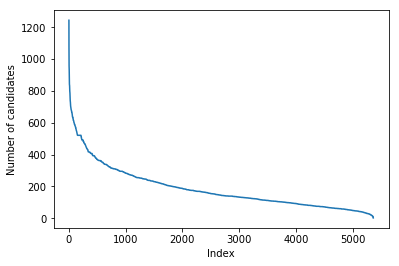

==== confu_in_2.pkl
Total_error: 5361
Sum_cands: 130127
Max_cands: 138
Min_cands: 1
Mean_cands: 24.27
Mid_cands: ('勿', 23)
Top 20 cands:
 [('雒', 138), ('瞿', 127), ('奪', 118), ('雅', 117), ('焦', 113), ('翟', 106), ('釁', 105), ('崔', 105), ('雍', 105), ('雉', 102), ('難', 102), ('霍', 99), ('雋', 96), ('養', 95), ('集', 92), ('隻', 91), ('穆', 91), ('雀', 90), ('雁', 90), ('截', 90)]


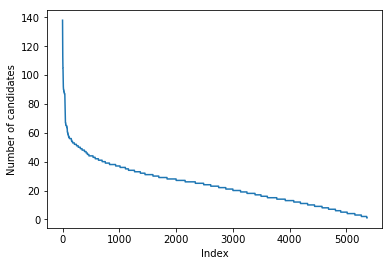

==== confu_in_3.pkl
Total_error: 5361
Sum_cands: 306343
Max_cands: 298
Min_cands: 1
Mean_cands: 57.14
Mid_cands: ('倔', 45)
Top 20 cands:
 [('居', 298), ('行', 288), ('癘', 287), ('藉', 284), ('吃', 252), ('戲', 250), ('祇', 239), ('枝', 239), ('釐', 236), ('圾', 229), ('契', 226), ('攜', 224), ('祭', 223), ('漆', 209), ('譏', 207), ('溪', 207), ('乩', 207), ('脊', 207), ('戟', 207), ('績', 207)]


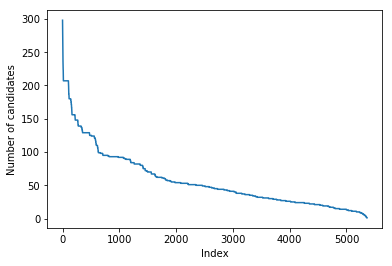

==== confu_in_4.pkl
Total_error: 5361
Sum_cands: 140584
Max_cands: 31
Min_cands: 1
Mean_cands: 26.22
Mid_cands: ('驅', 26)
Top 20 cands:
 [('案', 31), ('太', 31), ('短', 31), ('寡', 31), ('從', 31), ('譏', 31), ('焜', 31), ('誌', 31), ('睿', 31), ('球', 31), ('臍', 31), ('奔', 31), ('嘻', 31), ('麗', 31), ('評', 31), ('璀', 31), ('狩', 31), ('綜', 31), ('脊', 31), ('緘', 31)]


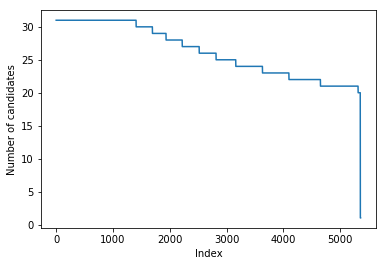

==== confu_in_5.pkl
Total_error: 5361
Sum_cands: 51655
Max_cands: 38
Min_cands: 1
Mean_cands: 9.64
Mid_cands: ('頤', 7)
Top 20 cands:
 [('淅', 38), ('混', 38), ('淳', 38), ('淇', 38), ('液', 38), ('涿', 38), ('淑', 38), ('涸', 38), ('淘', 38), ('淹', 38), ('淞', 38), ('渚', 38), ('淚', 38), ('涯', 38), ('淦', 38), ('淮', 38), ('淪', 38), ('淵', 38), ('清', 38), ('淒', 38)]


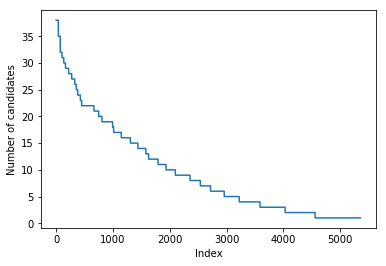

==== confu_in_6.pkl
Total_error: 5361
Sum_cands: 13658
Max_cands: 17
Min_cands: 1
Mean_cands: 2.55
Mid_cands: ('轂', 2)
Top 20 cands:
 [('愉', 17), ('識', 15), ('息', 15), ('愚', 14), ('是', 14), ('如', 14), ('事', 13), ('付', 13), ('胡', 13), ('折', 12), ('俞', 12), ('而', 12), ('新', 12), ('余', 11), ('緣', 11), ('游', 11), ('適', 11), ('知', 11), ('資', 11), ('兒', 11)]


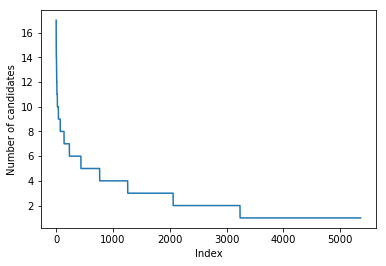

In [28]:
for file, path in filelist.items():
    print('==== {}'.format(file))
    sys_c = sysExtract(path)
    info(sys_c, os.path.splitext(file)[0])

In [9]:
def versus(gt_confusion, sys_confusion):
    tp, fn, fp = 0, 0, 0
    # s=gt
    # t=sys
    for er, gtcands in gt_confusion.items():
        if er in sys_confusion:
            sys_tmpSet = set(sys_confusion[er])
            sys_tmpSet.discard(er)        
            tp += len(sys_tmpSet.intersection(gtcands))
            fn += len(gtcands.difference(sys_tmpSet))
            fp += len(sys_tmpSet.difference(gtcands))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)

    return recall, precision
#     print('Recall= {}'.format(recall))
#     print('Precision= {}'.format(precision))

In [34]:
def converageConfusion(dataroot):
    filelist = {file:dataroot+file for _,_, files in os.walk(dataroot) for file in files if 'confu' in file}
    converage_file = os.path.join(dataroot, 'converage.csv')
    
    testUDNname = './UDN_benchmark/UDN_testdata.txt'
    testSIGname = ['./test_15/SIGHAN15_CSC_TestInput.txt', './test_15/SIGHAN15_CSC_TestTruth.txt']
    
    gt_cUDN = gtExtract(testUDNname, 'UDN')
    gt_cSIG = gtExtract(testSIGname,'SIGHAN2015')
    with open(converage_file, 'w', encoding='utf8') as wp:
        wp.write('Filename,Chars,MeanCands,UDNRecall,UDNPrecision,SIGRecall,SIGPrecision\n')
        for file, path in filelist.items():
            try:
                sys_c = sysExtract(path)
#                 sys_c = pickle.load(open(path, 'rb'))
            except:
                print(file)
            ava_ch, mean_cands = len(sys_c), sum(len(i) for i in sys_c.values())/len(sys_c)
            result_UDN = versus(gt_cUDN, sys_c)
            result_SIG = versus(gt_cSIG, sys_c)
            
            wp.write('{},{},{},{u[0]},{u[1]},{s[0]},{s[1]}\n'.format(
                file,ava_ch,mean_cands,
                u=result_UDN,
                s=result_SIG
                ))
                        

In [8]:
    testUDNname = './UDN_benchmark/UDN_testdata.txt'
    gt_cUDN = gtExtract(testUDNname, 'UDN')


In [6]:
a = './confusionTable/rule/rule_chPairs.pkl'

In [7]:
sys_c = pickle.load(open(a, 'rb'))

In [9]:
dataroot = './confusionTable/rule//'

In [10]:
converageConfusion(dataroot)